In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("temizClimate.csv")

In [3]:
pd.set_option('display.max_colwidth', None)
print(data.head(10))

                                                                                                                                                                                              text  \
0                                                                                                                      total population getting benefit safe potable drinking water due initiative   
1                                                             wrap — ppl electric’s winter relief assistance program — helps customers limited incomes reduce home energy use lower electric bills   
2                                                               believe power monitoring help hcms plant reforms future goal achieving lower environmental impact costs higher energy productivity   
3                                                                          solvents used inks produce almost volatile organic compounds vocs also greatly reduce negative impact work environments   
4         

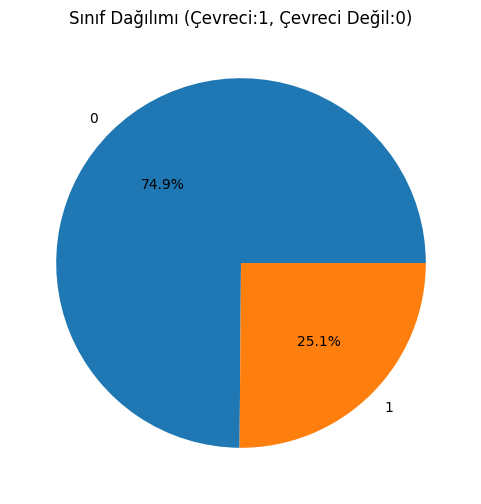

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

"""fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Çevrecilikle alakalı olan ve olamyan veriler')
sns.countplot(ax=ax, x='label', data=data, color='blue', order=data['label'].value_counts().index)"""

# Buradan asagiyi ben ekledim

plt.figure(figsize=(6, 6))
data['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Sınıf Dağılımı (Çevreci:1, Çevreci Değil:0)')
plt.ylabel('')
plt.show()

# Buradan yukariyi ben ekledim.

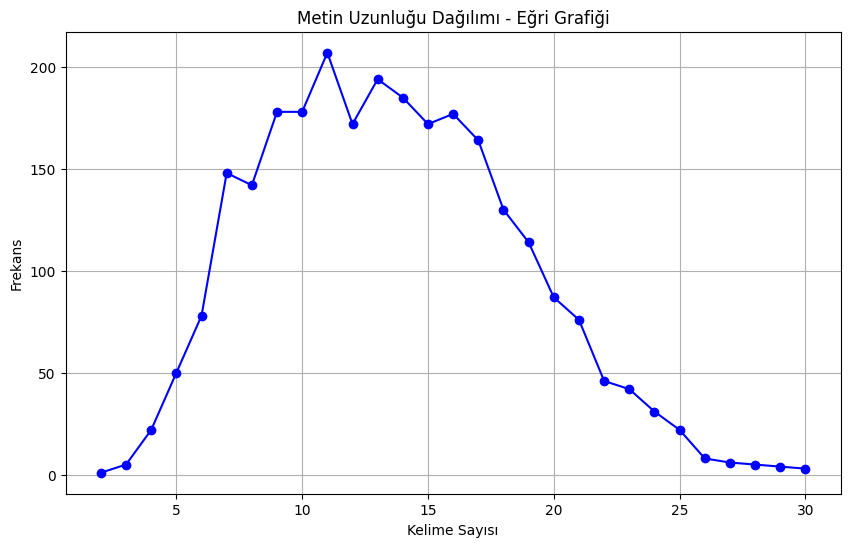

Metinlerde Ortalama cümle uzunluğu: 13.55


In [5]:
message_lengths = data['text'].astype(str).apply(lambda x: len(x.split()))

average_length = message_lengths.mean()

# Benim ekledigim yerin basi

"""plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, bins=30, kde=True, color='green')
plt.title('Metin Uzunluğu Dağılımı')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Frekans')
plt.show()"""

plt.figure(figsize=(10, 6))

# Kelime uzunluklarının frekansını hesapla
message_length_counts = message_lengths.value_counts().sort_index()

# Eğri grafiği çiz
plt.plot(message_length_counts.index, message_length_counts.values, marker='o', color='blue', linestyle='-')

# Grafik başlık ve etiketler
plt.title('Metin Uzunluğu Dağılımı - Eğri Grafiği')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Frekans')
plt.grid(True)  # Daha okunaklı bir grafik için ızgara ekleyin
plt.show()

# Benim ekledigim yerin sonu

print(f"Metinlerde Ortalama cümle uzunluğu: {average_length:.2f}")

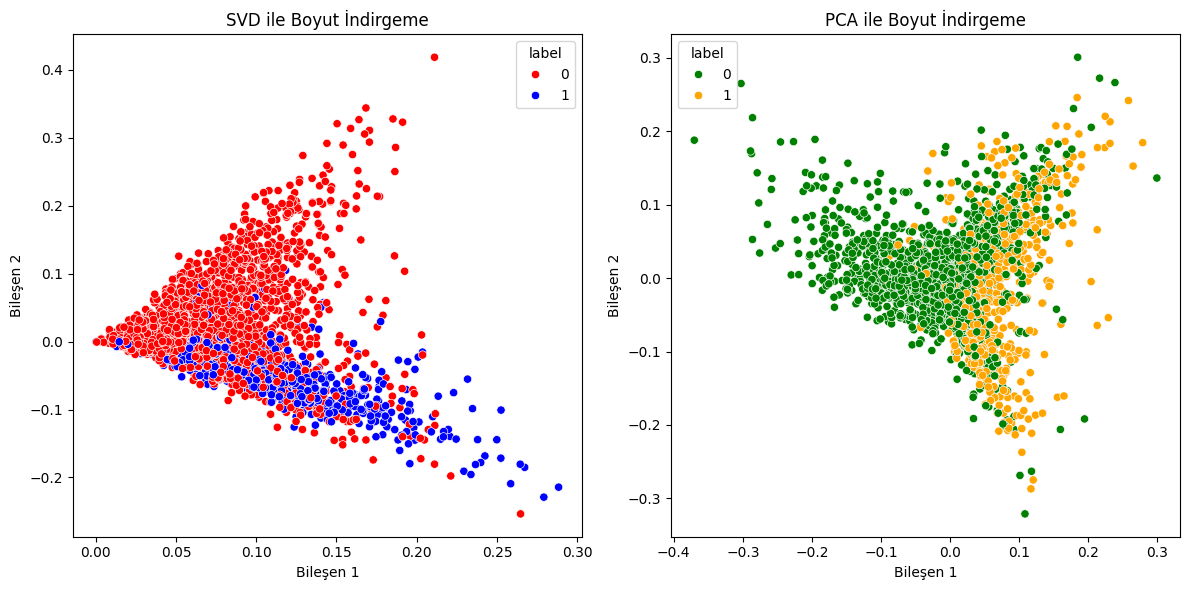

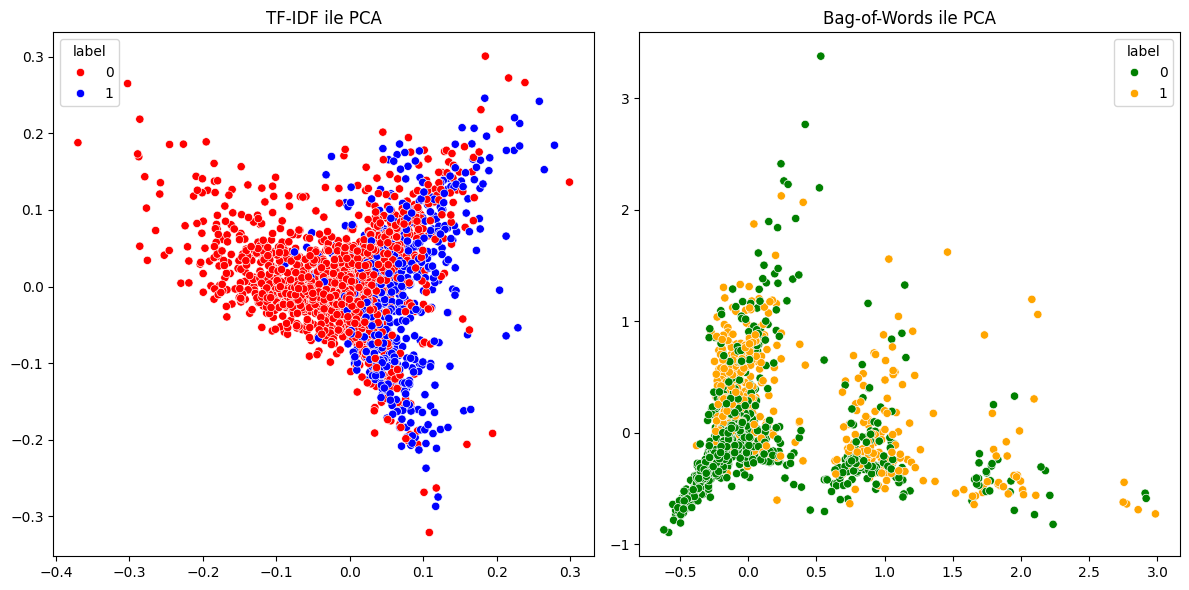

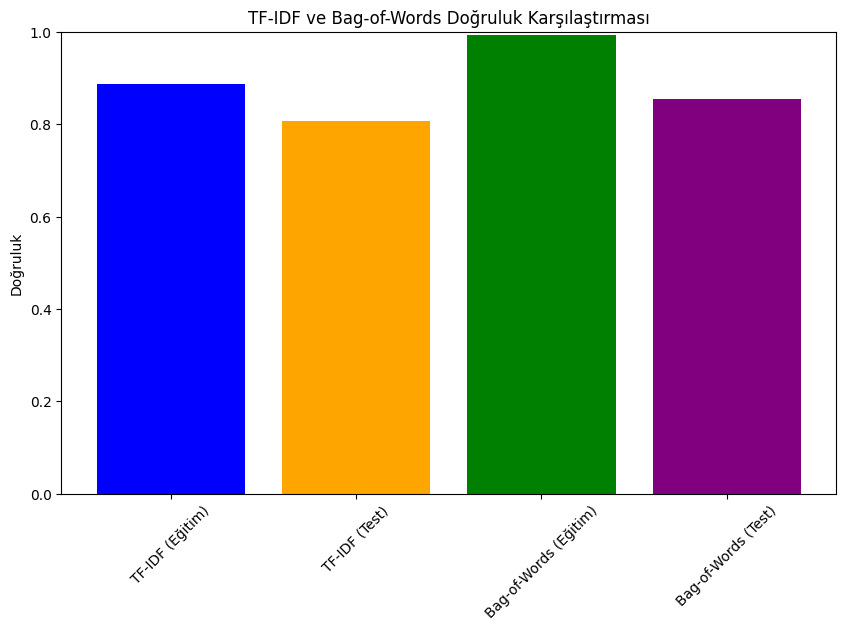

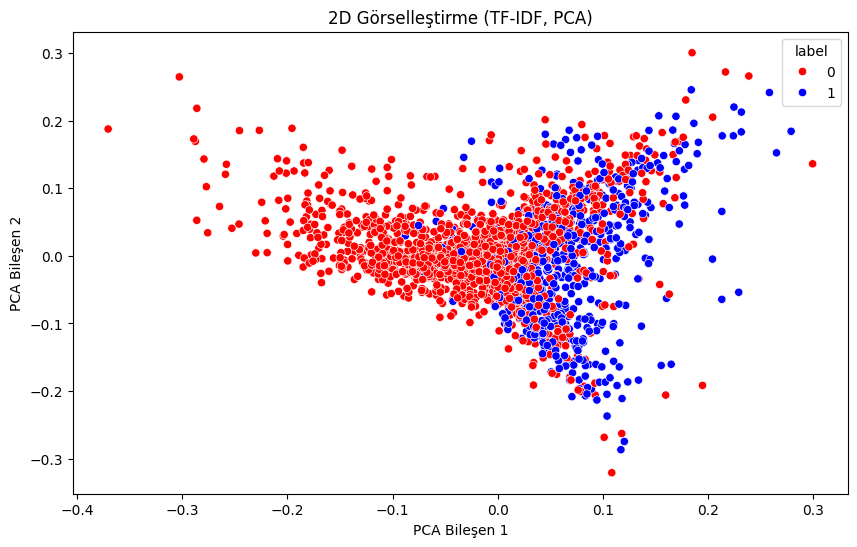

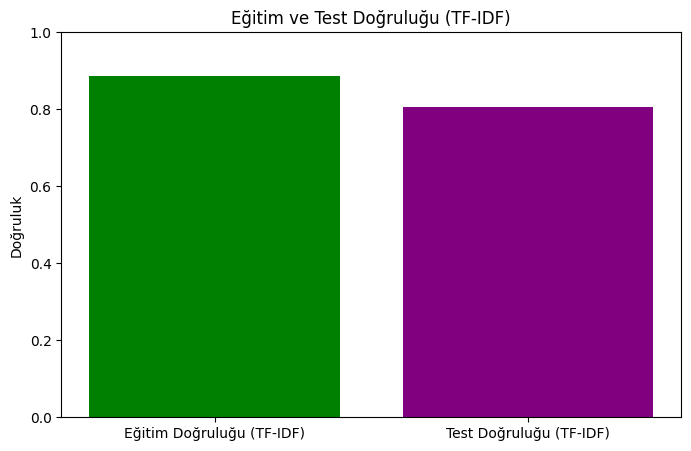

TF-IDF Eğitim Doğruluğu: 0.89
TF-IDF Test Doğruluğu: 0.81


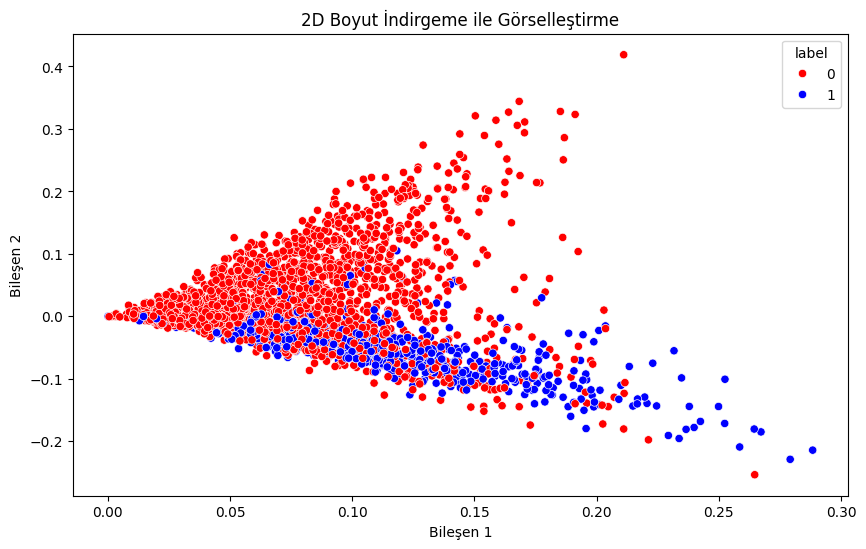

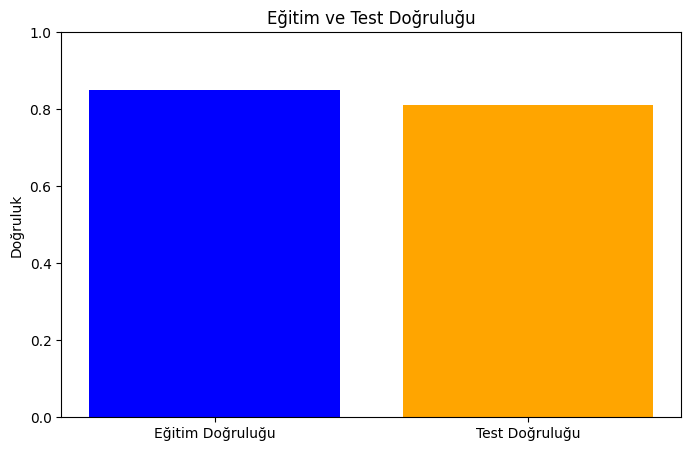

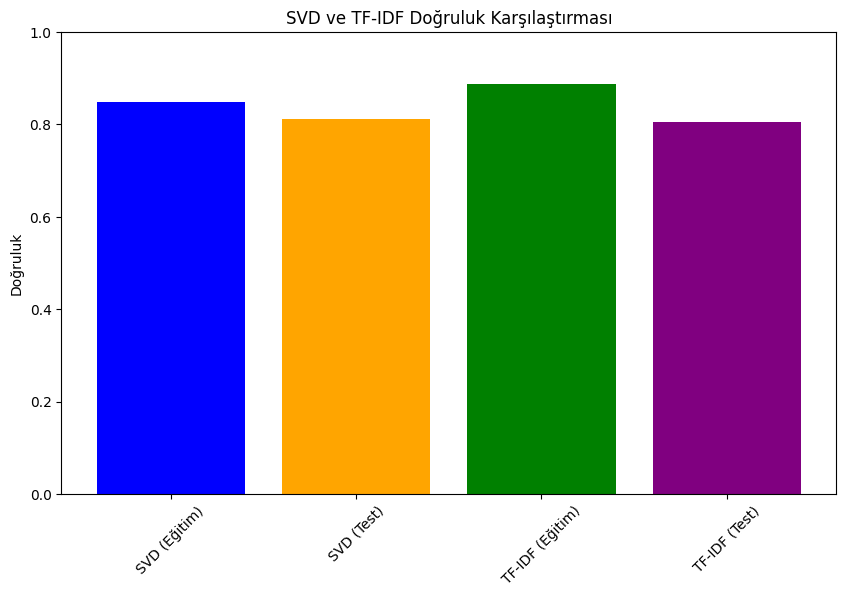

Test Accuracy: 0.8113207547169812
Test accuracy tf-idf: 0.8062893081761007


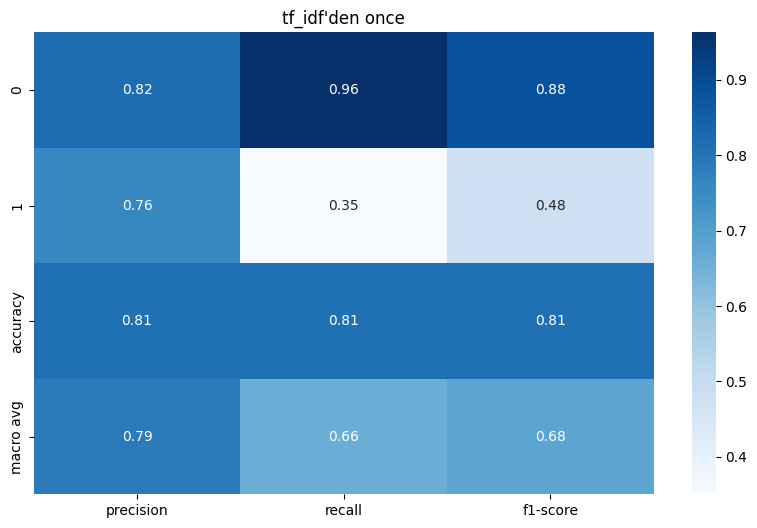

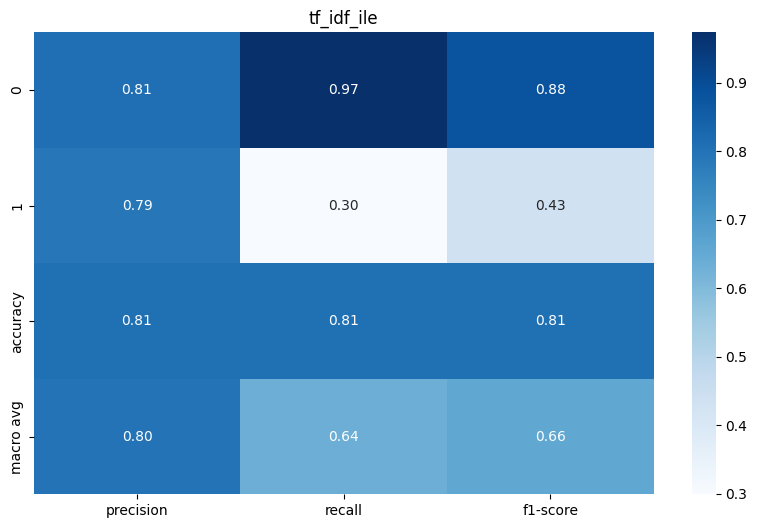

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       598
           1       0.76      0.35      0.48       197

    accuracy                           0.81       795
   macro avg       0.79      0.66      0.68       795
weighted avg       0.80      0.81      0.78       795



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd


# Metin verisini ve etiketleri ayıralım
text_data = data['text']
labels = data['label']

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (100 boyuta indir)
svd = TruncatedSVD(n_components= 400, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)




# Daha iyi gorseller elde etmek icin eklenen kisim

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42)

logistic_model_tfidf = LogisticRegression(max_iter=500, random_state=42)
logistic_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

train_accuracy_tfidf = accuracy_score(y_train_tfidf, logistic_model_tfidf.predict(X_train_tfidf))
test_accuracy_tfidf = accuracy_score(y_test_tfidf, logistic_model_tfidf.predict(X_test_tfidf))

svd_new = TruncatedSVD(n_components=2, random_state=42)
X_svd_new = svd.fit_transform(X_tfidf)

# Bag-of-Words özellik çıkarımı
bow_vectorizer_new = CountVectorizer(max_features=30000)
X_bow_new = bow_vectorizer_new.fit_transform(text_data)

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow_new, y_encoded, test_size=0.3, random_state=42)

logistic_model_bow = LogisticRegression(max_iter=500, random_state=42)
logistic_model_bow.fit(X_train_bow, y_train_bow)

train_accuracy_bow = accuracy_score(y_train_bow, logistic_model_bow.predict(X_train_bow))
test_accuracy_bow = accuracy_score(y_test_bow, logistic_model_bow.predict(X_test_bow))

pca_new = PCA(n_components=2, random_state=42)
X_pca_new = pca_new.fit_transform(X_tfidf.toarray())

# Karşılaştırmalı görselleştirme
plt.figure(figsize=(12, 6))

# SVD Görselleştirme
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_svd_new[:, 0], y=X_svd_new[:, 1], hue=data['label'], palette=['red', 'blue'])
plt.title('SVD ile Boyut İndirgeme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')

# PCA Görselleştirme
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_new[:, 0], y=X_pca_new[:, 1], hue=data['label'], palette=['green', 'orange'])
plt.title('PCA ile Boyut İndirgeme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')

plt.tight_layout()
plt.show()

# Boyut indirgeme (PCA örneği)
X_bow_pca_new = PCA(n_components=2, random_state=42).fit_transform(X_bow_new.toarray())

# Görselleştirme
plt.figure(figsize=(12, 6))

# TF-IDF PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca_new[:, 0], y=X_pca_new[:, 1], hue=data['label'], palette=['red', 'blue'])
plt.title('TF-IDF ile PCA')

# Bag-of-Words PCA
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_bow_pca_new[:, 0], y=X_bow_pca_new[:, 1], hue=data['label'], palette=['green', 'orange'])
plt.title('Bag-of-Words ile PCA')

plt.tight_layout()
plt.show()


methods = ['TF-IDF (Eğitim)', 'TF-IDF (Test)', 'Bag-of-Words (Eğitim)', 'Bag-of-Words (Test)']
accuracies = [train_accuracy_tfidf, test_accuracy_tfidf, train_accuracy_bow, test_accuracy_bow]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.title('TF-IDF ve Bag-of-Words Doğruluk Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Daha iyi gorseller elde etmek icin eklenen bolumun sonu





# Buradan asagiyi ben ekledim sikinti cikarsa silinecek.

#TF-IDF Bagimsiz deneme

# PCA ile 2 boyuta indirgeme
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())  # Sparse matrisi dense yapıyoruz


# 2D Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['label'], palette=['red', 'blue'])
plt.title('2D Görselleştirme (TF-IDF, PCA)')
plt.xlabel('PCA Bileşen 1')
plt.ylabel('PCA Bileşen 2')
plt.show()

# TF-IDF ile Eğitim ve Test verilerini ayıralım
#X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42)
# BURAYI SIMDILIK YORUM YAPIYORUM NORMAL YERI BURASI !!!!!





# Logistic Regression modelini tanımlayalım ve TF-IDF ile eğitelim
"""logistic_model_tfidf = LogisticRegression(max_iter=500, random_state=42)
logistic_model_tfidf.fit(X_train_tfidf, y_train_tfidf)"""
# BURAYI DA SIMDILIK YORUM YAPIYORUM NORMAL YERI BURASI !!!!!


# Tahmin yapalım
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Doğrulukları hesaplayalım
"""train_accuracy_tfidf = accuracy_score(y_train_tfidf, logistic_model_tfidf.predict(X_train_tfidf))
test_accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)"""
# BURAYI SIMDILIK YORUM YAPIYORUM NORMAL YERI BURASI !!!!!

# Doğrulukları görselleştirelim
plt.figure(figsize=(8, 5))
plt.bar(['Eğitim Doğruluğu (TF-IDF)', 'Test Doğruluğu (TF-IDF)'], [train_accuracy_tfidf, test_accuracy_tfidf], color=['green', 'purple'])
plt.title('Eğitim ve Test Doğruluğu (TF-IDF)')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

# Doğrulukları yazdıralım
print(f"TF-IDF Eğitim Doğruluğu: {train_accuracy_tfidf:.2f}")
print(f"TF-IDF Test Doğruluğu: {test_accuracy_tfidf:.2f}")
#TF-IDF Bagimsiz deneme sonu

# 2 Boyutlu Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=data['label'], palette=['red', 'blue'])
plt.title('2D Boyut İndirgeme ile Görselleştirme')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.show()

# Uc boyutlu gorsellestirme
"""fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=data['label'], cmap='viridis')
plt.colorbar(scatter)
plt.title('3D Boyut İndirgeme ile Görselleştirme')
plt.show()"""

# Benim ekledigim kismin sonu

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression modelini tanımlayalım
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = logistic_model.predict(X_test)

# Buradan asagisini ben ekledim. Sikinti cikarsa burasi cikarilacak

#Egitim dogrulugunun hesaplanmasi
train_accuracy = accuracy_score(y_train, logistic_model.predict(X_train))

# Test dogrulugunun hesaplanmasi
test_accuracy = accuracy_score(y_test, y_pred)

# Egitim ve Test dogruluklarinin gorsellestirilmesi.
plt.figure(figsize=(8, 5))
plt.bar(['Eğitim Doğruluğu', 'Test Doğruluğu'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Eğitim ve Test Doğruluğu')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

# SVD ve TF-IDF doğruluklarını karşılaştırma
methods = ['SVD (Eğitim)', 'SVD (Test)', 'TF-IDF (Eğitim)', 'TF-IDF (Test)']
accuracies = [train_accuracy, test_accuracy, train_accuracy_tfidf, test_accuracy_tfidf]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.title('SVD ve TF-IDF Doğruluk Karşılaştırması')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Benim ekledigim yerin sonu...

# Modelin başarımını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

accuracy_tf_idf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f"Test accuracy tf-idf: {accuracy_tf_idf}")

# Sınıf adlarını string olarak geçelim
target_names = [str(cls) for cls in label_encoder.classes_]

# Buradan asagisini ben ekledim
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_tf_idf = classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_tf_idf_df = pd.DataFrame(report_tf_idf).transpose()

# Heatmap ile tabloyu görselleştir TF-IDF'den once
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("tf_idf'den once")
plt.show()

# Heatmap ile tabloyu görselleştir TF-IDF ile
plt.figure(figsize=(10, 6))
sns.heatmap(report_tf_idf_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("tf_idf_ile")
plt.show()

# Buradan yukarisini ben ekledim

# Sınıflandırma raporu yazdıralım
print(classification_report(y_test, y_pred, target_names=target_names))

In [7]:
import pandas as pd
import nltk

# Gerekli veri dosyalarını indir
nltk.download()

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Lemmatizer'ı tanımla
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Metni kelimelere ayır
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  # Her kelimeyi lemmatize et
    return ' '.join(lemmatized)  # Tekrar birleştir

# Yeni sütun ekleyerek lemmatize edilmiş metinleri sakla
data['LemmatizeText'] = data['text'].apply(lemmatize_text)

# Sonucu kontrol et
print(data)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
                                                                                                                                                                          text  \
0                                                                                                  total population getting benefit safe potable drinking water due initiative   
1                                         wrap — ppl electric’s winter relief assistance program — helps customers limited incomes reduce home energy use lower electric bills   
2                                           believe power monitoring help hcms plant reforms future goal achieving lower environmental impact costs higher energy productivity   
3                                                      solvents used inks produce almost volatile organic compounds vocs also greatly reduce negative impact work environments   
4                            

In [8]:
data.to_csv("lemmaClimate")

In [9]:
data = pd.read_csv("lemmaClimate")

In [10]:
data.head(10)

,Unnamed: 0,text,label,LemmatizeText
0,0,total population getting benefit safe potable drinking water due initiative,1,total population getting benefit safe potable drinking water due initiative
1,1,wrap — ppl electric’s winter relief assistance program — helps customers limited incomes reduce home energy use lower electric bills,1,wrap — ppl electric ’ s winter relief assistance program — help customer limited income reduce home energy use lower electric bill
2,2,believe power monitoring help hcms plant reforms future goal achieving lower environmental impact costs higher energy productivity,1,believe power monitoring help hcms plant reform future goal achieving lower environmental impact cost higher energy productivity
3,3,solvents used inks produce almost volatile organic compounds vocs also greatly reduce negative impact work environments,1,solvent used ink produce almost volatile organic compound vocs also greatly reduce negative impact work environment
4,4,going gradual get end year year starting place thats,0,going gradual get end year year starting place thats
5,5,even plan meet sales profit targets thanks growth service business steady progress construction largescale domestic thermal power plants already received orders,0,even plan meet sale profit target thanks growth service business steady progress construction largescale domestic thermal power plant already received order
6,6,europe pulp paper mills fall eu emissions trading scheme eu ets south africa government committed introduce carbon tax,0,europe pulp paper mill fall eu emission trading scheme eu ets south africa government committed introduce carbon tax
7,7,integration fuel upstream procurement existing overseas power generation energy infrastructure businesses completed july company started fullscale operation one leading energy companies world,0,integration fuel upstream procurement existing overseas power generation energy infrastructure business completed july company started fullscale operation one leading energy company world
8,8,capital markets day hydro announced new extended improvement ambition aiming achieve improvements nok billion,0,capital market day hydro announced new extended improvement ambition aiming achieve improvement nok billion
9,9,new buildings breeamcertified provide good overall energy environmental quality,1,new building breeamcertified provide good overall energy environmental quality



Logistic Regression Test Accuracy: 0.9176470588235294


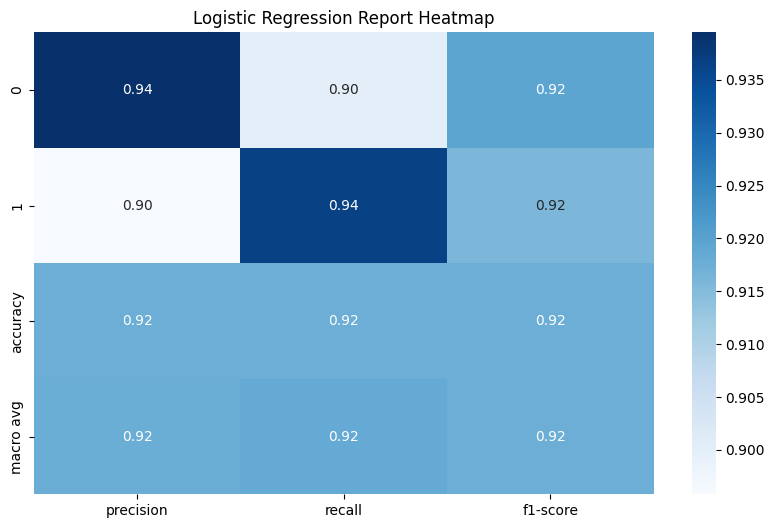

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       621
           1       0.90      0.94      0.92       569

    accuracy                           0.92      1190
   macro avg       0.92      0.92      0.92      1190
weighted avg       0.92      0.92      0.92      1190


Support Vector Machine (SVM) Test Accuracy: 0.926890756302521


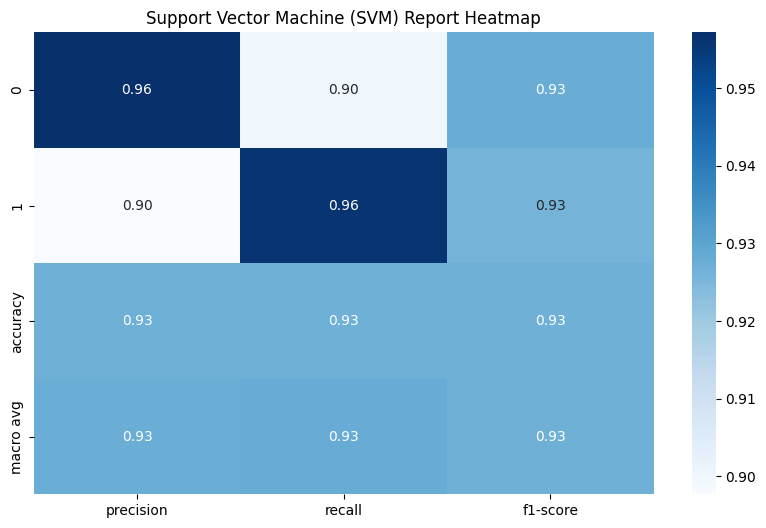

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       621
           1       0.90      0.96      0.93       569

    accuracy                           0.93      1190
   macro avg       0.93      0.93      0.93      1190
weighted avg       0.93      0.93      0.93      1190


K-Nearest Neighbors (KNN) Test Accuracy: 0.8756302521008403


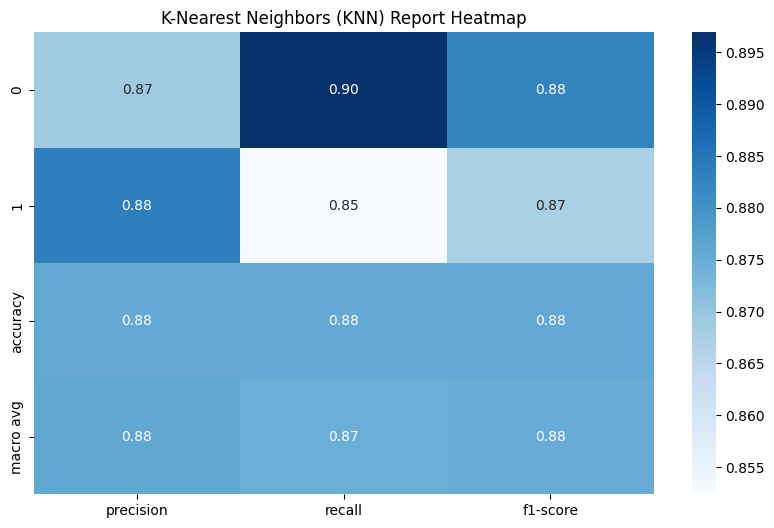

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       621
           1       0.88      0.85      0.87       569

    accuracy                           0.88      1190
   macro avg       0.88      0.87      0.88      1190
weighted avg       0.88      0.88      0.88      1190


Decision Tree Test Accuracy: 0.8680672268907563


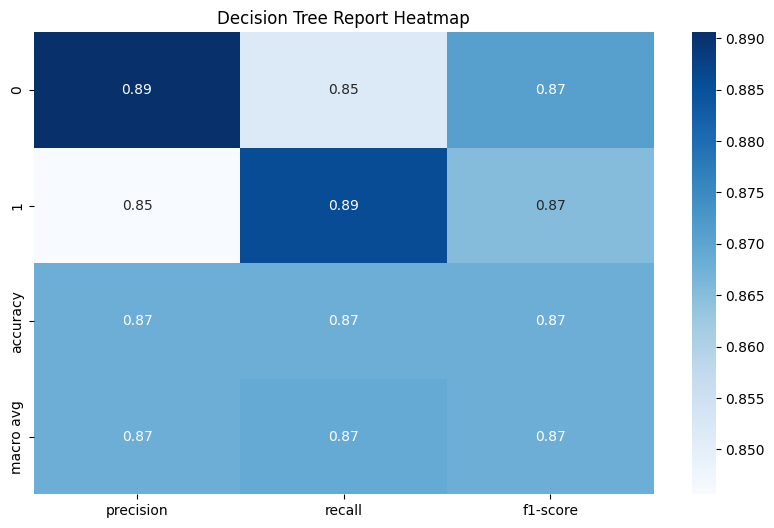

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       621
           1       0.85      0.89      0.87       569

    accuracy                           0.87      1190
   macro avg       0.87      0.87      0.87      1190
weighted avg       0.87      0.87      0.87      1190


Multi-Layer Perceptron (MLP) Test Accuracy: 0.9521008403361344


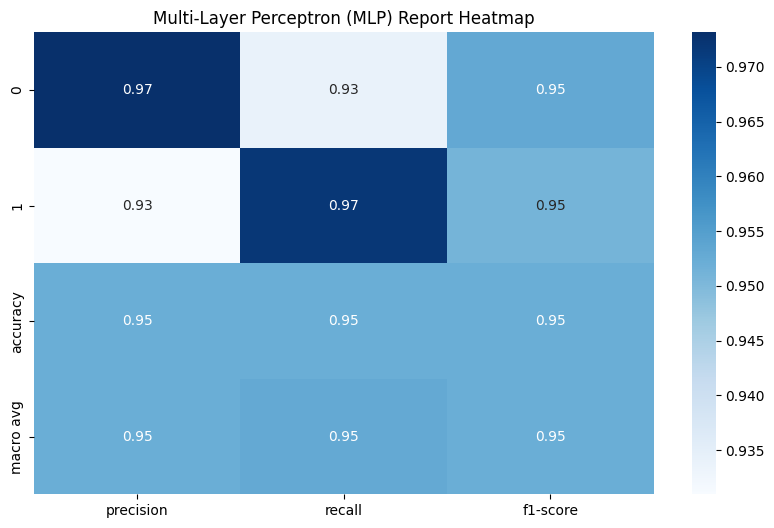

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       621
           1       0.93      0.97      0.95       569

    accuracy                           0.95      1190
   macro avg       0.95      0.95      0.95      1190
weighted avg       0.95      0.95      0.95      1190


Random Forest Test Accuracy: 0.9159663865546218


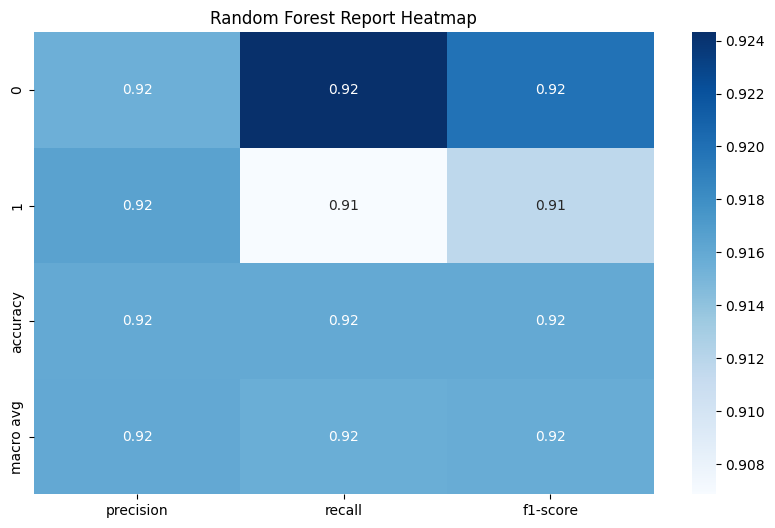

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       621
           1       0.92      0.91      0.91       569

    accuracy                           0.92      1190
   macro avg       0.92      0.92      0.92      1190
weighted avg       0.92      0.92      0.92      1190


XGBoost Test Accuracy: 0.8840336134453781


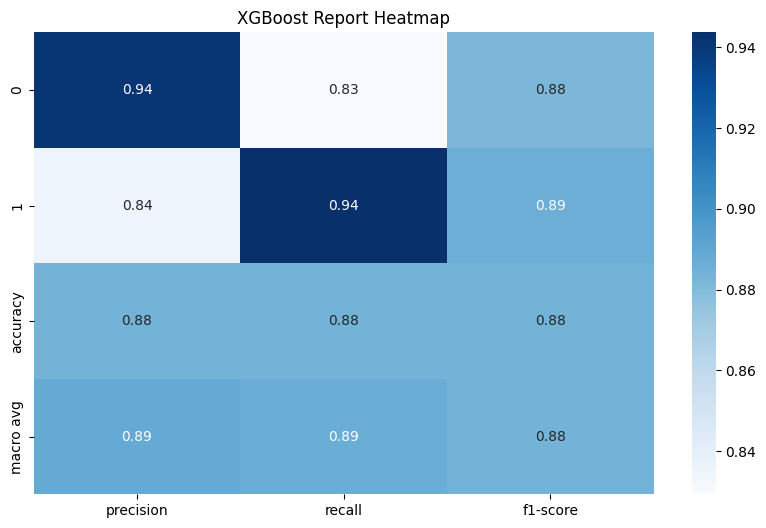

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       621
           1       0.84      0.94      0.89       569

    accuracy                           0.88      1190
   macro avg       0.89      0.89      0.88      1190
weighted avg       0.89      0.88      0.88      1190



c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6476 - loss: 0.6393 - val_accuracy: 0.9045 - val_loss: 0.2103
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9531 - loss: 0.1256 - val_accuracy: 0.9459 - val_loss: 0.1348
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9911 - loss: 0.0373 - val_accuracy: 0.9477 - val_loss: 0.1392
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9974 - loss: 0.0102 - val_accuracy: 0.9495 - val_loss: 0.1459
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9514 - val_loss: 0.1517
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9495 - val_loss: 0.1593
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 6.1466e-04 - val_accuracy: 0.9495 - val_loss: 0.1666
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 3.9610e-04 - val_accuracy: 0.

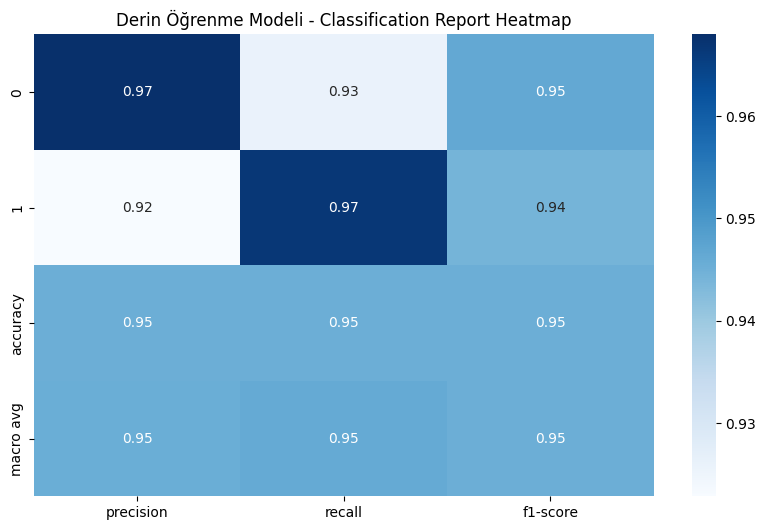

C:\Users\ROG\AppData\Local\Temp\ipykernel_20732\1412532064.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_dogruluklari, y=model_isimleri, palette='mako')


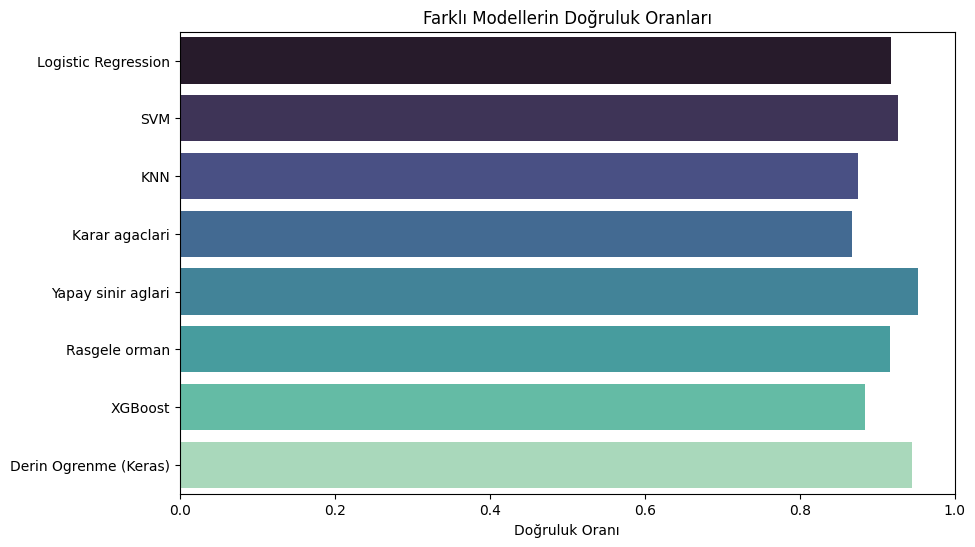

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Metin verisini ve etiketleri ayıralım
text_data = data['text']
labels = data['label']

# TF-IDF özellik çıkarımı (30000 en çok kullanılan kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (400 boyuta indir)
svd = TruncatedSVD(n_components=900, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Chi-Square ile ozellik secimi
selector = SelectKBest(chi2, k=5000)
X_selected = selector.fit_transform(X_tfidf, y_encoded)

# SMOTE kullanimi (Burada da eskiden X_selected yerine X_reduced vardi)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_selected, y_encoded)

# Burada verisetini dengelemeye calisiyorum (Burasi opsiyonel)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_reduced, y_encoded)

# Bag-of-Words özellik çıkarımı
bow_vectorizer_new = CountVectorizer(max_features=20000)
X_bow_new = bow_vectorizer_new.fit_transform(text_data)

# Eğitim ve test verilerini ayıralım (Burada normalde X_resampled ve y_resampled yerine, X_reduced ve y_encoded oluyordu önceden)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)
X_train_for_derin, X_test_for_derin, y_train_for_derin, y_test_for_derin = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42) 


# Burada bos bir dizi tanimliyorum
model_dogruluklari = [] 
# Burada da model isimlerini uygulanma sirasi ile birlikte tutan dizi var
model_isimleri = ["Logistic Regression", "SVM", "KNN", "Karar agaclari", "Yapay sinir aglari", "Rasgele orman", "XGBoost", "Derin Ogrenme (Keras)"]

# Model Eğitimi ve Değerlendirmesi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Tahmin yap
    
    # Modelin başarımını değerlendirelim
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Test Accuracy: {accuracy}")
    
    # Alttaki satiri da ben ekledim.
    model_dogruluklari.append(accuracy)
    
    # Sınıf adlarını string olarak geçelim
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Her bir model sonucu heatmap olusturmak icin buradan asagisini ben ekledim
    report_model = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    report_df_model = pd.DataFrame(report_model).transpose()

    # Heatmap ile tabloyu görselleştir
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df_model.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"{model_name} Report Heatmap")
    plt.show()
    # Benim eklediim yerin sonu
    
    print(classification_report(y_test, y_pred, target_names=target_names))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
evaluate_model(logistic_model, "Logistic Regression")

# SVM
svm_model = SVC(kernel='linear', random_state=42)
evaluate_model(svm_model, "Support Vector Machine (SVM)")

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, "K-Nearest Neighbors (KNN)")

# Karar Ağaçları
decision_tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree_model, "Decision Tree")

# Yapay Sinir Ağları (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Multi-Layer Perceptron (MLP)")

# Random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")

# XGBoost
params = {'objective': 'binary:logistic', 'scale_pos_weight': 3}
xgb_model = xgb.XGBClassifier(**params)
#xgb_model.fit(X_trains, y_train)
evaluate_model(xgb_model, "XGBoost")

# derin ogrenme
model_derin = Sequential([
    Dense(512, activation='relu', input_dim=X_resampled_smote.shape[1]),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_derin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_derin.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_derin = (model_derin.predict(X_test) > 0.5).astype("int32")
accuracy_derin = accuracy_score(y_test, y_pred_derin)
model_dogruluklari.append(accuracy_derin)


report_derin = classification_report(y_test, y_pred_derin, target_names=[str(cls) for cls in label_encoder.classes_], output_dict=True)
report_df_derin = pd.DataFrame(report_derin).transpose()

# Heatmap ile görselleştir DERIN OGRENME
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_derin.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Derin Öğrenme Modeli - Classification Report Heatmap")
plt.show()

# Buradan hücrenin sonuna kadar da ben ekledim.
plt.figure(figsize=(10, 6))
sns.barplot(x=model_dogruluklari, y=model_isimleri, palette='mako')
plt.xlabel('Doğruluk Oranı')
plt.title('Farklı Modellerin Doğruluk Oranları')
plt.xlim(0, 1)
plt.show()

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6998 - loss: 0.6144 - val_accuracy: 0.7736 - val_loss: 0.4520
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4211 - val_accuracy: 0.7774 - val_loss: 0.4421
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 0.3758 - val_accuracy: 0.7761 - val_loss: 0.4401
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.3846 - val_accuracy: 0.7824 - val_loss: 0.4392
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.3785 - val_accuracy: 0.7862 - val_loss: 0.4437
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.3638 - val_accuracy: 0.7811 - val_loss: 0.4447
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3719 - val_accuracy: 0.7962 - val_loss: 0.4344
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8340 - loss: 0.3791 - val_accuracy: 0.8000 - val_loss:

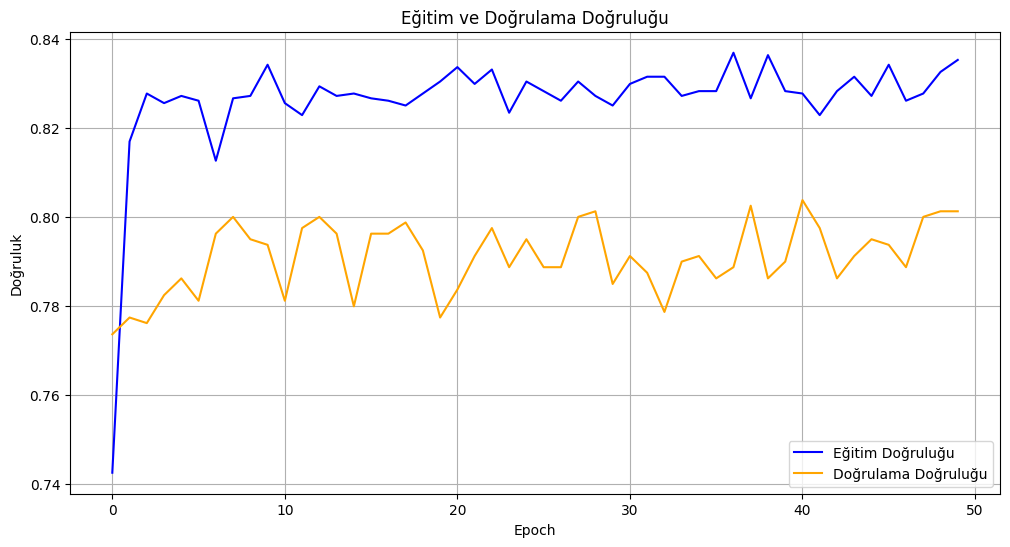

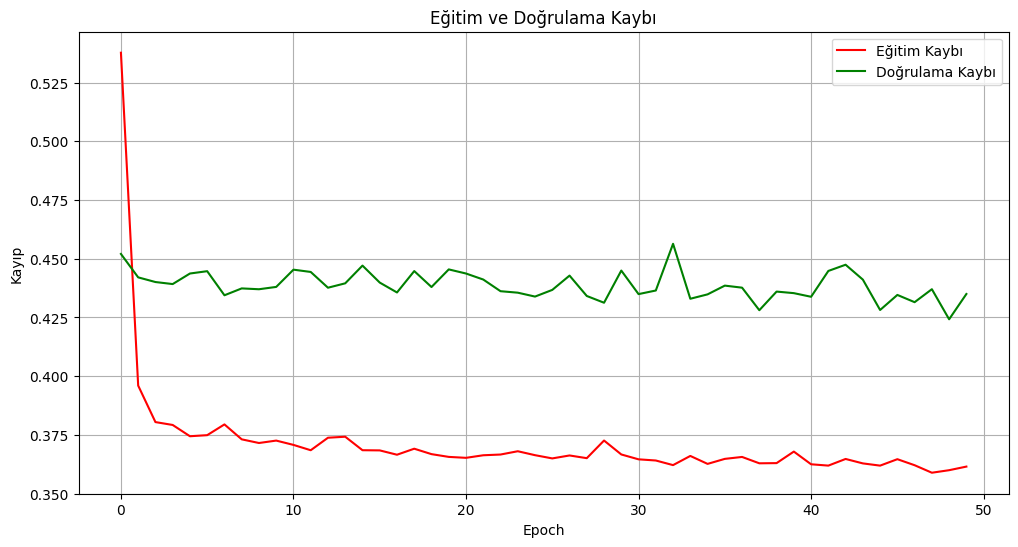

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4097 
Test Accuracy: 0.801257848739624


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_categorical, test_size=0.3, random_state=42)

# Yapay sinir ağı modelini tanımlayalım
model = Sequential([
    Dense(256, input_dim=3, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='blue')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='orange')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim ve doğrulama kaybını görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='red')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='green')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)
plt.show()

# Modelin başarımını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
